# <span style="color:orange"> Assignment 06- Weather.<span>
*By Laura Lyons*
***

The purpose of this assignement is to create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv and plot the following variables:

1. Temperature
2. Mean temperature each day
3. Mean temperature for each month

Additional marks are available for plotting:

4. Windspeed (there is data missing from this column)
5. The rolling windspeed (say over 24 hours)
6. The max windspeed for each day
7. The monthly mean of the daily max windspeeds (yer I am being nasty here)

#### <span style="color:orange">Prerequisites/ Imports <span>

The first step is to download a number of imports:

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### <span style="color:orange"> Load the Data<span>

The [data](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) was downloaded from the link provided on the [assessment document](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

Before analysis, it is best practice to assess the data integrity and manipulate as necessary ie (remove/ replace missing data, ensure the row headers are appropriate/present etc.)

At first glance, i can see that we will need to amend the data set prior to analysis by:
1. Downloading the data set.
1. Removing the first 23 rows, as these rows do not contain data of interest to this analysis.

In [70]:
# Dowdload the dataset
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

# Define column names
column_names = ['date_time', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'wddir', 'ind.4', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']

# Load the dataset with the specified column names
# Skip the first 23 rows of the dataset
df = pd.read_csv(url, names=column_names, header=0, skiprows=23, low_memory=False)

# Drop specific columns by their names
columns_to_drop = ['ind', 'rain', 'ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wddir', 'ind.4', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']
df_dropped = df.drop(columns=columns_to_drop)
df_dropped.head()

,date_time,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [71]:
df_dropped['date_time'] = pd.to_datetime(df_dropped['date_time'], format='%d-%b-%Y %H:%M')

# Extract year, month, day, and time into separate columns
df_dropped['date'] = df_dropped['date_time'].dt.date
df_dropped['year'] = df_dropped['date_time'].dt.year
df_dropped['month'] = df_dropped['date_time'].dt.month
df_dropped['day'] = df_dropped['date_time'].dt.day
df_dropped['time'] = df_dropped['date_time'].dt.time
df_dropped['month_year'] = df_dropped['date_time'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df_dropped.head())

            date_time  temp wdsp        date  year  month  day      time  \
0 1996-04-10 14:00:00  11.5    0  1996-04-10  1996      4   10  14:00:00   
1 1996-07-31 08:00:00  11.5    0  1996-07-31  1996      7   31  08:00:00   
2 1996-07-31 09:00:00  11.6    0  1996-07-31  1996      7   31  09:00:00   
3 1996-07-31 10:00:00  12.9    0  1996-07-31  1996      7   31  10:00:00   
4 1996-07-31 11:00:00  14.5    0  1996-07-31  1996      7   31  11:00:00   

  month_year  
0    1996-04  
1    1996-07  
2    1996-07  
3    1996-07  
4    1996-07  


***
#### <span style="color:orange"> Plot 1: Daily Temperature Over Time <span>

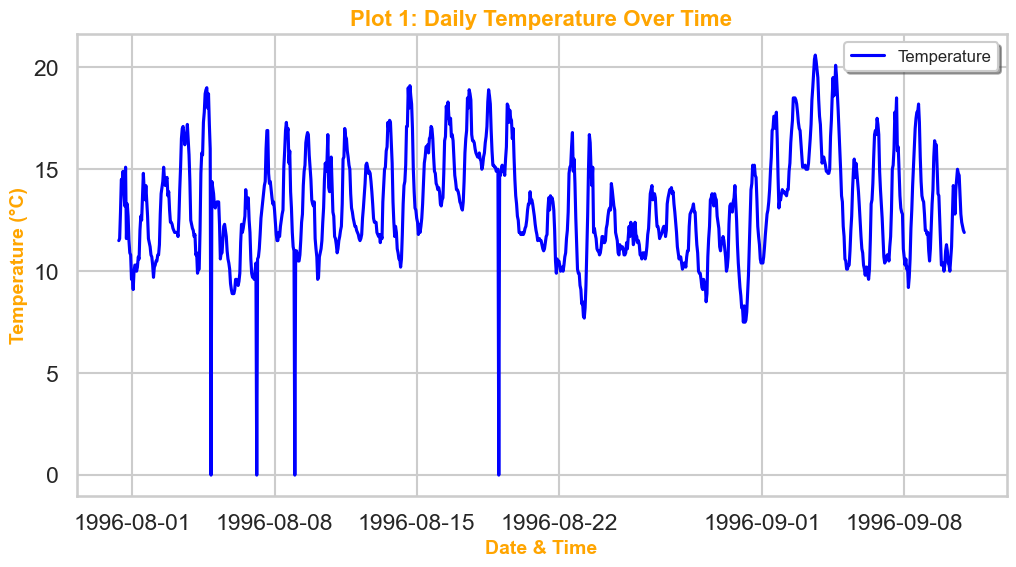

In [72]:
# Set the style of the plot
sns.set_style("whitegrid")
sns.set_context("talk") # To increase the readability of the plot (reference )

# Create a line plot
plt.figure(figsize=(12, 6))

# The code was timng out when plotting the entire dataset, so I have limited to the first 1000 rows.
sns.lineplot(data=df_dropped.iloc[1:1001], x='date_time', y='temp', color='blue')

# Add titles and labels, fontweight='bold'
plt.title('Plot 1: Daily Temperature Over Time', fontsize=16, fontweight='bold', color='orange')
plt.legend(['Temperature'], loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.xlabel('Date & Time', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='orange')
plt.savefig('images/Assignment06_Plot1.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 2: Mean Daily Temperature Over Time. <span>

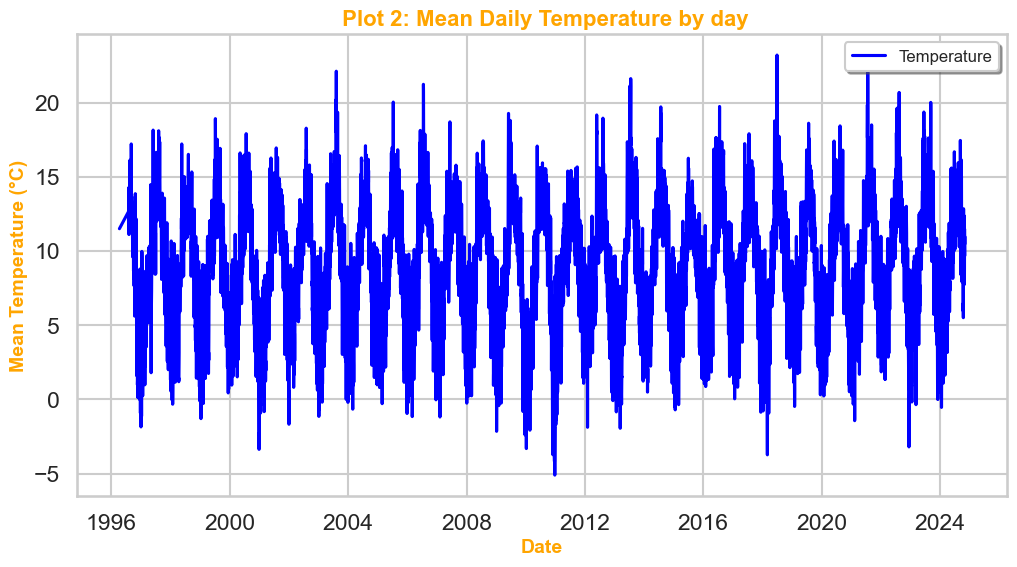

In [73]:
# Calculate the mean temperature for each day
mean_daily_temp = df_dropped.groupby('date')['temp'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")
sns.set_context("talk")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_daily_temp, x='date', y='temp', color='blue')

# Add titles and labels
plt.title(' Plot 2: Mean Daily Temperature by day', fontsize=16, fontweight='bold', color='orange')
plt.legend(['Temperature'], loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.xlabel('Date', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Temperature (°C)', fontsize=14, fontweight='bold', color='orange')
plt.savefig('images/Assignment06_Plot2.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 3: Mean Monthly Temperature Over Time. <span>

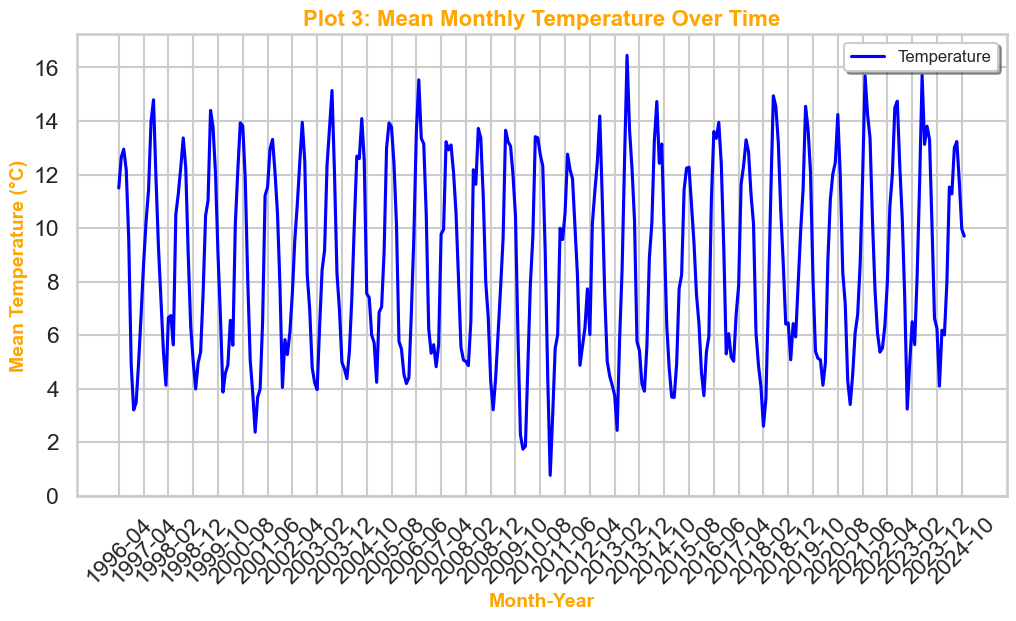

In [74]:
mean_monthly_temp = df_dropped.groupby('month_year')['temp'].mean().reset_index()
mean_monthly_temp['month_year'] = mean_monthly_temp['month_year'].astype(str)

sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))
sns.lineplot(data= mean_monthly_temp, x='month_year', y='temp', color='blue')

# Add titles and labels
plt.title('Plot 3: Mean Monthly Temperature Over Time', fontsize=16, fontweight='bold', color='orange')
plt.legend(['Temperature'], loc='upper right', fontsize=12, frameon=True, shadow=True)
plt.xlabel('Month-Year', fontsize=14, color='orange', fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=14, color='orange', fontweight='bold')

# Limit the number of x-axis labels by setting intervals 
# (Source: https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks)
plt.xticks(ticks=mean_monthly_temp.index[::10], labels=mean_monthly_temp['month_year'][::10], rotation=45)

plt.savefig('images/Assignment06_Plot3.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 4: Windspeed Over Time. <span>

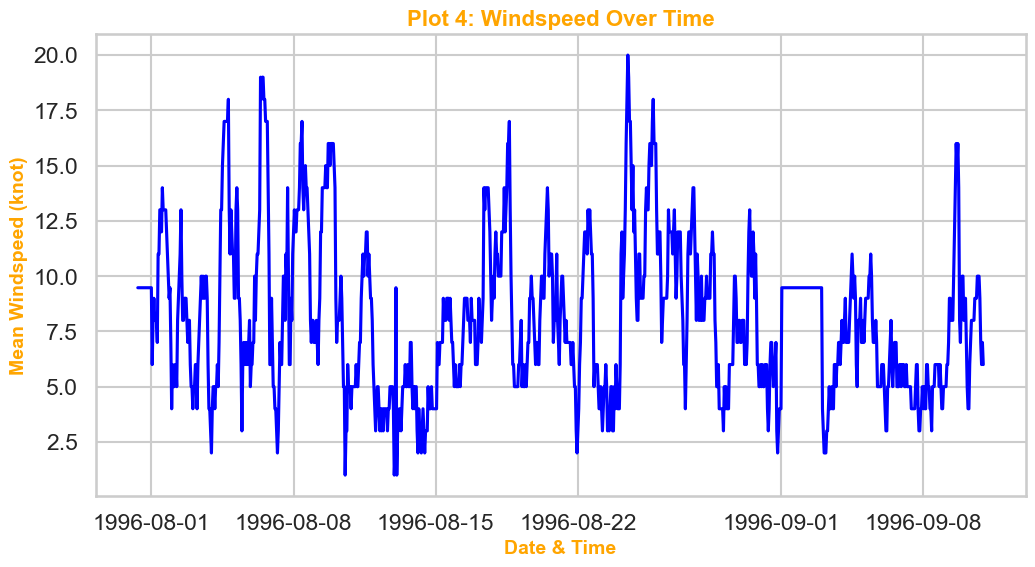

In [75]:
# A future warning appreared after running the code below.
# Code used to ignore the FutureWarnings
# Reference : https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert non-numeric strings to NaN
df_dropped['temp'] = pd.to_numeric(df_dropped['temp'], errors='coerce')
df_dropped['wdsp'] = pd.to_numeric(df_dropped['wdsp'], errors='coerce')

# Replace 0 with NaN
df_dropped.replace(0, np.nan, inplace=True)

# Calculate the mean of the 'temp' and 'wdsp' columns, ignoring NaN values
temp_mean = df_dropped['temp'].mean()
wdsp_mean = df_dropped['wdsp'].mean()

# Replace NaN values with the column mean
df_dropped['temp'].fillna(temp_mean, inplace=True)
df_dropped['wdsp'].fillna(wdsp_mean, inplace=True)

# Lets plot the data.
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dropped.iloc[1:1001], x='date_time', y='wdsp', color='blue')

# Add titles and labels, fontweight='bold'
plt.title('Plot 4: Windspeed Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date & Time', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Windspeed (knot)', fontsize=14, fontweight='bold', color='orange')
plt.savefig('images/Assignment06_Plot4.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 5: Rolling Windspeed Over 24hours. <span>

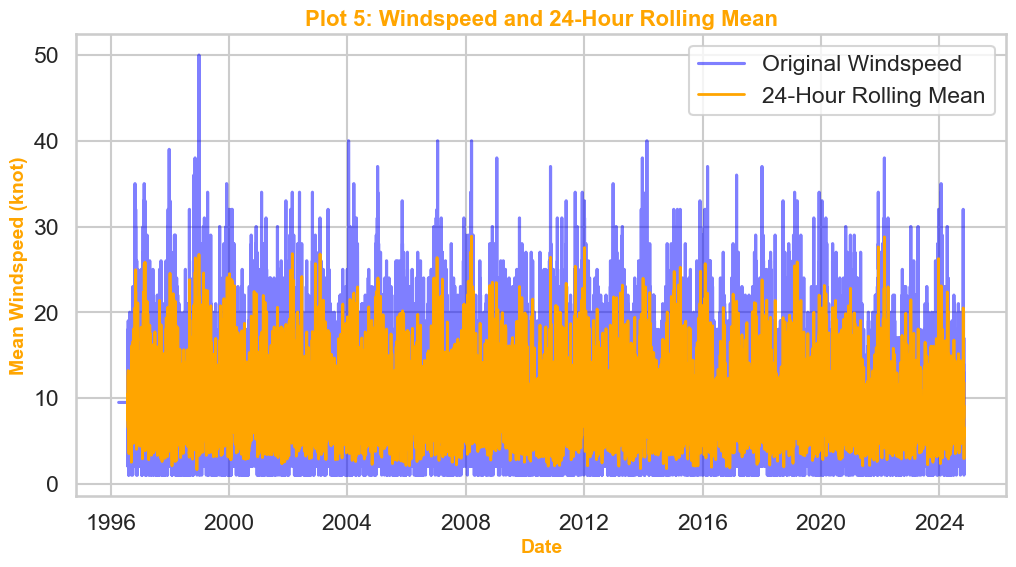

In [76]:
df_dropped['date_time'] = pd.to_datetime(df_dropped['date_time'], format='%d-%b-%Y %H:%M')

# Set the 'date_time' column as the index
df_dropped.set_index('date_time', inplace=True)

# Convert relevant columns to numeric values (handle non-numeric values if any)
df_dropped['wdsp'] = pd.to_numeric(df_dropped['wdsp'], errors='coerce')

# Select only the numeric columns for resampling
numeric_columns = df_dropped.select_dtypes(include='number')

# Resample the numeric columns to an hourly frequency
resampled_df = numeric_columns.resample('H').mean()

# Calculate the rolling mean over 24 hours
resampled_df['rolling_mean'] = resampled_df['wdsp'].rolling(window=24).mean()

# Lets plot the data.
sns.set_style("whitegrid")
sns.set_context("talk")


# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled_df, x=resampled_df.index, y='wdsp', color= 'blue' ,label='Original Windspeed', alpha=0.5)
sns.lineplot(data=resampled_df, x=resampled_df.index, y='rolling_mean', label='24-Hour Rolling Mean', color='orange', linewidth=2)
plt.title('Plot 5: Windspeed and 24-Hour Rolling Mean', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Windspeed (knot)', fontsize=14, fontweight='bold', color='orange')
plt.legend()
plt.savefig('images/Assignment06_Plot5.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 6: The Maximum Windspeed for each day, over Time. <span>

In [77]:
# I need to identify all the blank cells in the 'wdsp' column and would like to replace them with the mean of the 'wdsp' column.

# Identify blank cells in 'wdsp' column and replace them with NaN
df_dropped['wdsp'].replace('', np.nan, inplace=True)

# Calculate the mean of the 'wdsp' column, ignoring NaN values
wdsp_mean = df_dropped['wdsp'].mean()

# Replace NaN values with the column mean
df_dropped['wdsp'].fillna(wdsp_mean, inplace=True)

# Sanity check that it worked.
missing_values = df_dropped['wdsp'].isnull().sum()
print(f"Number of missing values in 'wdsp' column: {missing_values}")

Number of missing values in 'wdsp' column: 0


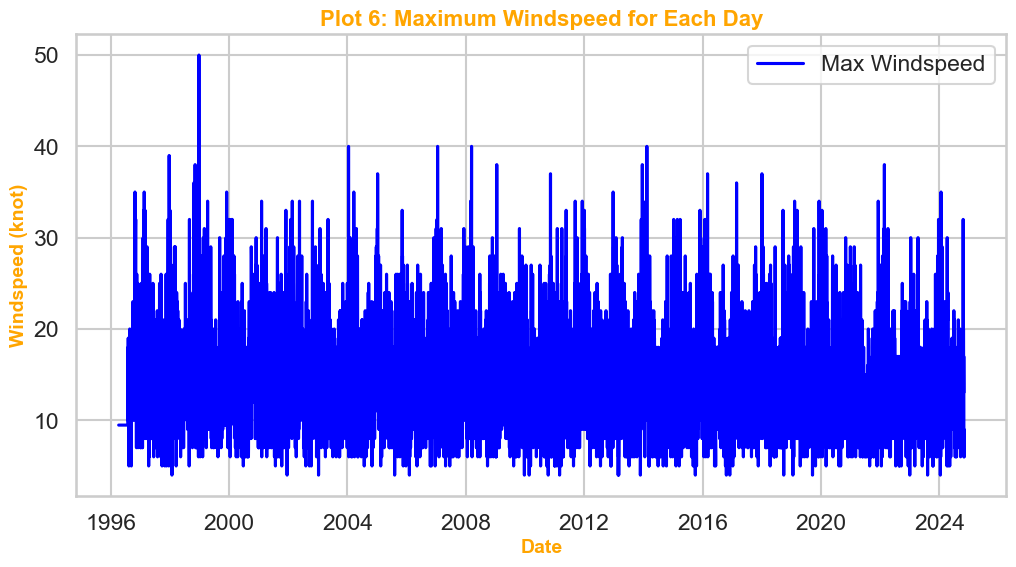

In [78]:
# Calculate the maximum windspeed for each day
max_daily_wdsp = df_dropped.groupby('date')['wdsp'].max().reset_index()

# Convert the 'date' column back to datetime format for plotting
max_daily_wdsp['date'] = pd.to_datetime(max_daily_wdsp['date'])

# Plot the maximum windspeed for each day using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=max_daily_wdsp, x='date', y='wdsp', label='Max Windspeed', color='blue')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Windspeed (knot)', fontsize=14, fontweight='bold', color='orange')
plt.title('Plot 6: Maximum Windspeed for Each Day', fontsize=16, fontweight='bold', color='orange')
plt.legend()
plt.savefig('images/Assignment06_Plot6.jpg')
plt.show()

***
#### <span style="color:orange"> Plot 7: The monthly mean of the daily max windspeeds, over Time. <span>

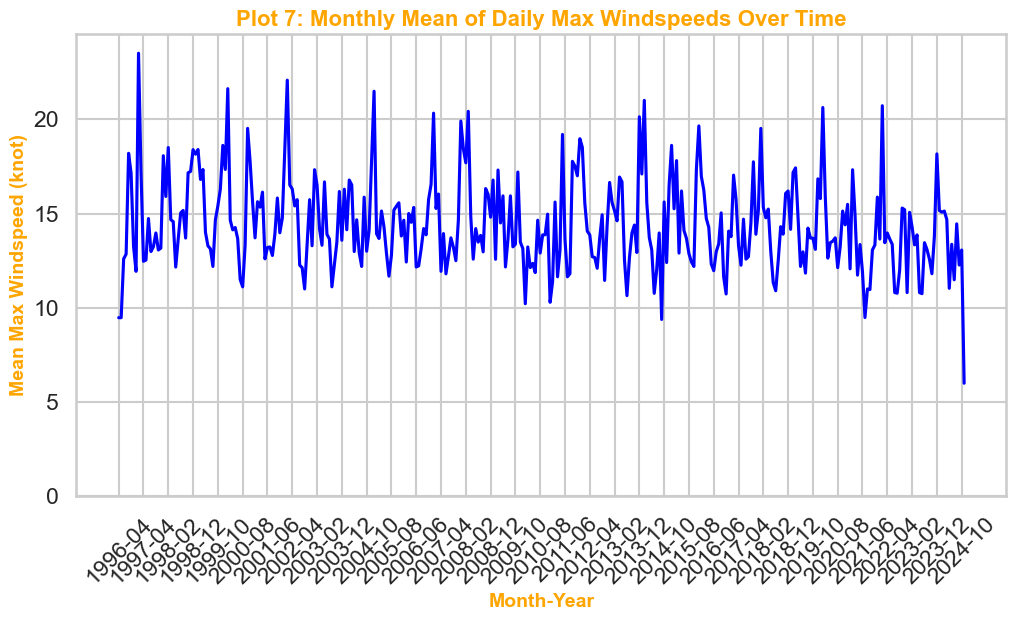

In [79]:
# CoPilot was used to help generate the code below.

# Calculate the monthly mean of the daily max windspeeds
monthly_mean_max_wdsp = max_daily_wdsp.groupby(max_daily_wdsp['date'].dt.to_period('M'))['wdsp'].mean().reset_index()
# Reference= https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html

# Convert the 'date' column to a string for plotting
monthly_mean_max_wdsp['date'] = monthly_mean_max_wdsp['date'].astype(str)

# Plot the monthly mean of the daily max windspeeds
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_mean_max_wdsp, x='date', y='wdsp', color='blue')

# Add titles and labels
plt.title('Plot 7: Monthly Mean of Daily Max Windspeeds Over Time', fontsize=16, fontweight='bold', color='orange')
plt.xlabel('Month-Year', fontsize=14, fontweight='bold', color='orange')
plt.ylabel('Mean Max Windspeed (knot)', fontsize=14, fontweight='bold', color='orange')

# Lets ensure that the y axis starts from 0
plt.ylim(0, monthly_mean_max_wdsp['wdsp'].max() + 1)
# Limit the number of x-axis labels by setting intervals
plt.xticks(ticks=monthly_mean_max_wdsp.index[::10], labels=monthly_mean_max_wdsp['date'][::10], rotation=45)

plt.savefig('images/Assignment06_Plot7.jpg')
plt.show()


***
### <span style="color:orange"> End